In [103]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
TRAIN_DIR = r'C:\projects\MNIT Hackathon\Data\train'
TEST_DIR = r'C:\projects\MNIT Hackathon\Data\test'
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)


angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [104]:
print(train)
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

                                                   image      label
0      C:\projects\MNIT Hackathon\Data\train\angry\im...      angry
1      C:\projects\MNIT Hackathon\Data\train\angry\im...      angry
2      C:\projects\MNIT Hackathon\Data\train\angry\im...      angry
3      C:\projects\MNIT Hackathon\Data\train\angry\im...      angry
4      C:\projects\MNIT Hackathon\Data\train\angry\im...      angry
...                                                  ...        ...
28704  C:\projects\MNIT Hackathon\Data\train\surprise...  surprised
28705  C:\projects\MNIT Hackathon\Data\train\surprise...  surprised
28706  C:\projects\MNIT Hackathon\Data\train\surprise...  surprised
28707  C:\projects\MNIT Hackathon\Data\train\surprise...  surprised
28708  C:\projects\MNIT Hackathon\Data\train\surprise...  surprised

[28709 rows x 2 columns]
angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [105]:
print(test)
print(test['image'])


                                                  image      label
0     C:\projects\MNIT Hackathon\Data\test\angry\im1...      angry
1     C:\projects\MNIT Hackathon\Data\test\angry\im1...      angry
2     C:\projects\MNIT Hackathon\Data\test\angry\im1...      angry
3     C:\projects\MNIT Hackathon\Data\test\angry\im1...      angry
4     C:\projects\MNIT Hackathon\Data\test\angry\im1...      angry
...                                                 ...        ...
7164  C:\projects\MNIT Hackathon\Data\test\surprised...  surprised
7165  C:\projects\MNIT Hackathon\Data\test\surprised...  surprised
7166  C:\projects\MNIT Hackathon\Data\test\surprised...  surprised
7167  C:\projects\MNIT Hackathon\Data\test\surprised...  surprised
7168  C:\projects\MNIT Hackathon\Data\test\surprised...  surprised

[7169 rows x 2 columns]
0       C:\projects\MNIT Hackathon\Data\test\angry\im1...
1       C:\projects\MNIT Hackathon\Data\test\angry\im1...
2       C:\projects\MNIT Hackathon\Data\test\angry\im1.

In [106]:
from tqdm import tqdm


In [107]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features


In [108]:
train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]C:\Users\kakar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 28709/28709 [02:50<00:00, 168.17it/s]


In [109]:
test_features = extract_features(test['image'])


100%|██████████| 7169/7169 [00:44<00:00, 162.17it/s]


In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [112]:
y_train_encoded = le.transform(train['label'])
y_test_encoded = le.transform(test['label'])

In [113]:
y_train = to_categorical(y_train_encoded,num_classes = 7)
y_test = to_categorical(y_test_encoded,num_classes = 7)

In [114]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [115]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 128)      0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 23, 23, 128)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 256)      0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 10, 10, 256)      

In [55]:
model.fit(train_features, y_train, batch_size=128, epochs=15, validation_data=(test_features, y_test))

Epoch 1/15
225/225 [==============================] - 270s 1s/step - loss: 1.4782 - accuracy: 0.4277 - val_loss: 1.4010 - val_accuracy: 0.4790
Epoch 2/15
225/225 [==============================] - 260s 1s/step - loss: 1.4550 - accuracy: 0.4391 - val_loss: 1.4551 - val_accuracy: 0.4554
Epoch 3/15
225/225 [==============================] - 260s 1s/step - loss: 1.4401 - accuracy: 0.4440 - val_loss: 1.3467 - val_accuracy: 0.4923
Epoch 4/15
225/225 [==============================] - 259s 1s/step - loss: 1.4278 - accuracy: 0.4503 - val_loss: 1.3475 - val_accuracy: 0.5047
Epoch 5/15
225/225 [==============================] - 259s 1s/step - loss: 1.4116 - accuracy: 0.4626 - val_loss: 1.3601 - val_accuracy: 0.4992
Epoch 6/15
225/225 [==============================] - 259s 1s/step - loss: 1.4015 - accuracy: 0.4638 - val_loss: 1.3360 - val_accuracy: 0.4991
Epoch 7/15
225/225 [==============================] - 260s 1s/step - loss: 1.3965 - accuracy: 0.4654 - val_loss: 1.3317 - val_accuracy: 0.4981

In [56]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [116]:
from keras.models import model_from_json

In [117]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [118]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [119]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [120]:
from PIL import Image
image='../Data/train/sad/im42.png'
img = Image.open(image)
# image = '.Model//Data/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 102ms/step
model prediction is  sad


C:\Users\kakar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 25ms/step
model prediction is  sad


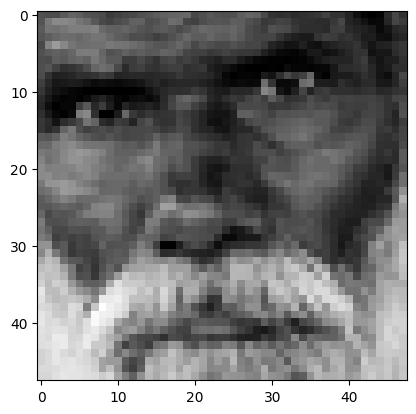

In [122]:
image='../Data/train/sad/im42.png'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 29ms/step
model prediction is  sad


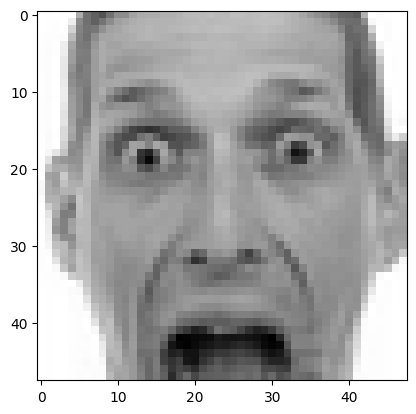

In [123]:
image='../Data/train/fearful/im2.png'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 22ms/step
model prediction is  sad


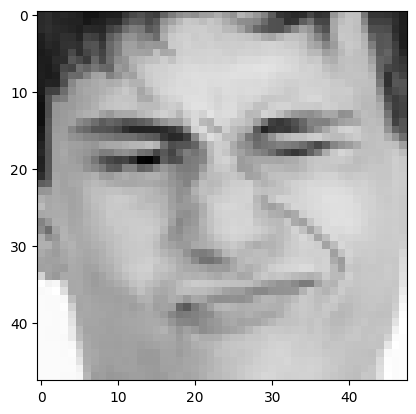

In [124]:
image = '../Data/train/disgusted/im5.png'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 26ms/step
model prediction is  sad


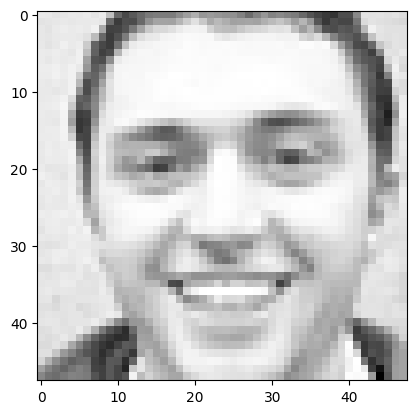

In [125]:
image = '../Data/train/happy/im7.png'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 28ms/step
model prediction is  sad


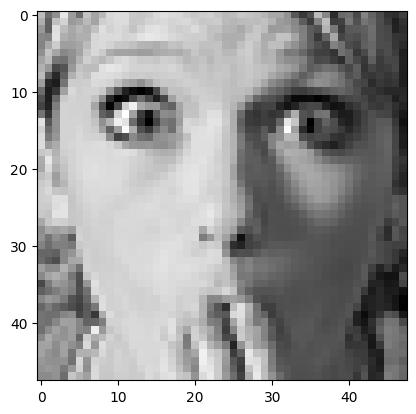

In [126]:
image = '../Data/train/surprised/im15.png'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')